In [3]:
import sympy as sp
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.optimize import fmin
import scipy.integrate as integrate
import scipy.special as special
import scipy.stats as st
import sys
font1 = {'size'   : 20, 'family':'STIXGeneral'}

from platform import python_version

print(python_version())

3.7.7


In [1]:
#LCDM fractions 

mptkm = 3.086*10**(19) 
H0 = 67.32/mptkm
Oc = 0.265
Ob = 0.0494
Om = Oc + Ob
Orad = 0.00006
ai = 0.000001
arad=0.0002264 #radiation -DM equality 
acmb = 0.0009 
Gnewton = 6.67*10**(-11)

def Hub(Om, Orad, a): 
    return H0*np.sqrt(Om/a**3 + Orad/a**4 + (1-Om-Orad))
def rhoc(a): 
    return 3*Hub(Om, Orad, a)**2/(8*np.pi/Gnewton)
def Omegac(a): 
    return Oc/a**3*(H0/Hub(Om,Orad,a))**2
def Omegarad(a): 
    return Orad/a**4*(H0/Hub(Om,Orad,a))**2
def Omegab(a): 
    return Ob/a**3*(H0/Hub(Om,Orad,a))**2

<Figure size 432x288 with 0 Axes>

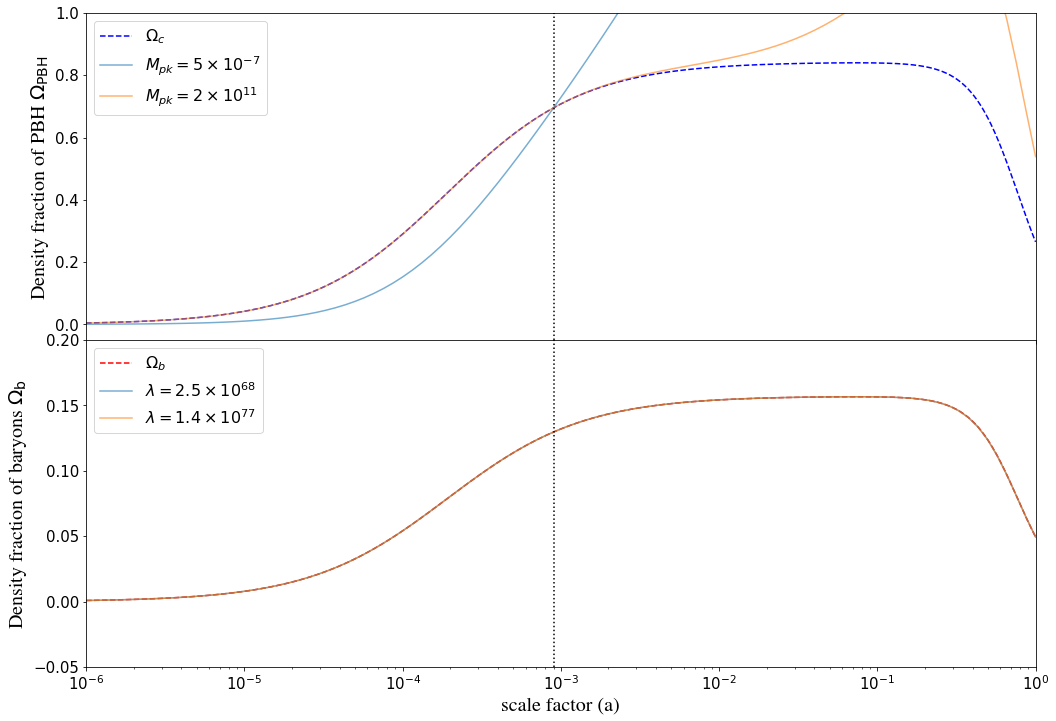

In [18]:
fig0 = plt.figure()

plt.figure(figsize=(15,10))

#Load Omega_pbh data at early and late times
dat1 = np.loadtxt("data/peakm_5e-7.dat")
dat2 = np.loadtxt("data/peakm_2e11.dat")
# dat3 = np.loadtxt("data/peakm_5e11.dat")
# dat4 = np.loadtxt("data/peakm_5e13.dat")
# dat5 = np.loadtxt("data/peakm_5e33.dat")

avals = np.logspace(-6, 0, num=1000)

ax = plt.subplot(2, 1, 1)
plt.xscale('log')

plt.plot(avals, Omegac(avals),linestyle='dashed', color='b', label= '$\Omega_c$',alpha=1.)

plt.plot(dat1[:,0], dat1[:,1], label='$M_{pk} = 5\\times 10^{-7}$', alpha=0.6)
plt.plot(dat2[:,0], dat2[:,1], label='$M_{pk} = 2\\times 10^{11}$', alpha=0.6)
# plt.plot(dat3[:,0], dat3[:,1], label='$M_{pk} = 5\\times 10^{11}$',alpha=0.6)
# plt.plot(dat4[:,0], dat4[:,1], label='$M_{pk} = 5\\times 10^{13}$',alpha=0.6)
# plt.plot(dat5[:,0], dat5[:,1], label='$M_{pk} = 5\\times 10^{33}$',alpha=0.6)

plt.axvline(acmb,0.,10, color='k', linestyle='dotted')

ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(-0.05,1.)
plt.xlim(ai,1)
plt.ylabel('Density fraction of PBH $\Omega_{\\rm PBH}$ ',**font1)
plt.legend(loc='best',prop={'size': 16})
plt.tight_layout(pad=3.0)

ax = plt.subplot(2, 1, 2)
plt.xscale('log')

plt.plot(avals, Omegab(avals),linestyle='dashed', color='r', label= '$\Omega_b$',alpha=1.)

plt.plot(dat1[:,0], dat1[:,2], label='$\lambda = 2.5\\times 10^{68}$', alpha=0.6)
plt.plot(dat2[:,0], dat2[:,2], label='$\lambda = 1.4\\times 10^{77}$', alpha=0.6)
#plt.plot(dat3[:,0], dat3[:,2], label='$\lambda = 3.5\\times 10^{77}$', alpha=0.6)
#plt.plot(dat4[:,0], dat4[:,2], label='$\lambda = 1.4\\times 10^{77}$', alpha=0.6)
#plt.plot(dat5[:,0], dat5[:,2], label='$\lambda = 1.4\\times 10^{77}$', alpha=0.6)

plt.axvline(acmb,0.,10, color='k', linestyle='dotted')

ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(-0.05,0.2)
plt.xlim(ai,1)
plt.ylabel('Density fraction of baryons $\Omega_{\\rm b}$ ',**font1)
plt.xlabel('scale factor (a)', **font1)
plt.legend(loc='best',prop={'size': 16})


plt.setp(plt.subplot(2,1,1).get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=0.)
plt.subplots_adjust(wspace=0.)

plt.savefig('plots/density_fracs.png', format="png", bbox_inches = 'tight')


<Figure size 432x288 with 0 Axes>

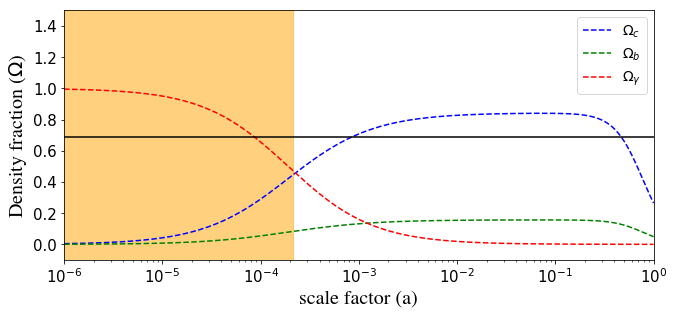

In [6]:
# Plotting LCDM fractions 
fig0 = plt.figure()
plt.figure(figsize=(10,5))

avals = np.logspace(-6, 0, num=1000)

ax = plt.subplot(1, 1, 1)
plt.xscale('log')

plt.plot(avals, Omegac(avals),linestyle='dashed', color='b', label= '$\Omega_c$',alpha=1.)
plt.plot(avals, Omegab(avals),linestyle='dashed', color='g', label= '$\Omega_b$',alpha=1.)
plt.plot(avals, Omegarad(avals),linestyle='dashed', color='r', label= '$\Omega_\gamma$',alpha=1.)


ax.axvspan(ai, 0.000215, alpha=0.5, color='orange')
plt.axhline(y=0.6856, xmin=0., xmax=10,color='k')

ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(-0.1,1.5)
plt.xlim(ai,1)
plt.xlabel('scale factor (a)', **font1)
plt.ylabel('Density fraction ($\Omega$) ',**font1)
plt.legend(loc='best',prop={'size': 14})
plt.tight_layout(pad=3.0)

plt.savefig('plots/lcdm_epochs.png', format="png", bbox_inches = 'tight')